## Setup

In [1]:
!pip install --quiet git+https://github.com/songlab-cal/gpn.git

     |████████████████████████████████| 4.7 MB 4.9 MB/s 
     |████████████████████████████████| 365 kB 42.7 MB/s 
     |████████████████████████████████| 2.3 MB 44.1 MB/s 
     |████████████████████████████████| 1.8 MB 32.0 MB/s 
     |████████████████████████████████| 101 kB 9.5 MB/s 
     |████████████████████████████████| 212 kB 57.3 MB/s 
     |████████████████████████████████| 115 kB 38.9 MB/s 
     |████████████████████████████████| 141 kB 41.7 MB/s 
     |████████████████████████████████| 596 kB 47.7 MB/s 
     |████████████████████████████████| 127 kB 43.6 MB/s 
     |████████████████████████████████| 6.6 MB 35.8 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
     |████████████████████████████████| 157 kB 47.9 MB/s 
     |████████████████████████████████| 181 kB 48.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 157 kB 48.5 MB/s 
     |████████████████████████████████| 157 kB 49.4 MB/s 
     |████████████

In [2]:
import gpn.mlm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [3]:
model_path = "gonzalobenegas/gpn-arabidopsis"

Example region: Chr5:3566900-3567600

[UCSC Genome Browser view](http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566900%2D3567600&hgsid=168371_2GqAevCqfiJ56NDL5fdLqTbAtbay)

In [4]:
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

## Tokenization

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'t': 5, 'a': 2, 'c': 3, '[PAD]': 1, '[MASK]': 0, 'g': 4}

In [6]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([3, 4, 4, 4, 5, 5, 2, 2, 2, 2])

## Embedding

In [7]:
model = AutoModel.from_pretrained(model_path)

Some weights of the model checkpoint at gonzalobenegas/gpn-arabidopsis were not used when initializing ConvNetModel: ['cls.decoder.3.weight', 'cls.decoder.2.weight', 'cls.decoder.0.bias', 'cls.decoder.3.bias', 'cls.decoder.0.weight', 'cls.decoder.2.bias']
- This IS expected if you are initializing ConvNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ConvNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [9]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [10]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-1.835589,-1.541905,-0.238540,-1.693257,2.109568,-0.737568,0.011309,-0.885544,-1.201539,0.355981,...,-1.678981,-0.683935,-0.990211,-0.740793,0.086302,2.120030,-0.326725,0.013269,0.376877,-2.192544
1,0.502391,-0.413907,-1.651946,0.665900,1.805942,-1.143564,1.566530,-0.604033,1.715510,0.688254,...,0.052591,0.613966,0.924556,-0.670097,-1.152318,-0.437756,-1.348986,-1.095818,0.791875,-1.106606
2,0.174562,0.290890,-1.462019,-0.044248,7.850872,-0.629226,-1.583409,-1.343719,0.631091,-0.711367,...,0.071234,2.153192,1.075352,-0.855834,1.819156,-0.540154,1.928945,-1.257256,-0.044256,0.005488
3,0.845877,2.528122,-1.166451,0.449965,2.137017,-1.778234,1.579288,1.056455,2.196358,1.176794,...,1.364694,-0.056385,-1.739924,-0.463984,-1.586328,-0.513797,0.120276,-0.094355,3.293190,-0.155779
4,0.678362,-0.356865,-0.751411,1.898579,3.406995,0.821938,-0.175457,0.880360,-0.547203,-0.179410,...,-0.624501,2.052833,-0.260927,-0.331720,0.768430,-0.469594,0.576744,-0.594854,-0.824444,-1.026139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.158464,0.288363,-0.682777,-0.299099,-0.416011,-0.256051,-0.628429,0.367042,-0.453733,-0.409429,...,-0.766662,0.733319,0.520050,-0.687605,0.002665,-0.498097,1.334327,1.353250,0.423357,-0.195218
696,-0.361002,-0.118865,0.976166,0.881883,0.201672,0.697162,-1.200054,0.816164,-0.804861,-0.241003,...,-0.057523,-0.531214,-1.224921,0.836704,-1.121337,-0.527719,-0.912433,-1.079709,-0.815929,-0.663119
697,-0.740464,0.261595,-0.028741,1.123034,1.093491,0.299930,-0.637927,-0.545146,-0.086054,-0.327027,...,-0.706143,-0.146340,3.845963,-0.584979,0.024109,-0.502198,1.133360,-0.831395,0.327394,-0.383623


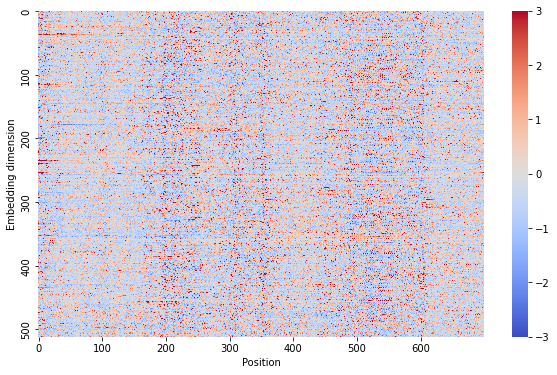

In [11]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

## Masked language modeling

In [12]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)

In [13]:
seq[489:492]  # Start codon

'ATG'

In [14]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [15]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 6])

In [16]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 2.1082, -1.1158, -0.4431, -0.1633])

In [17]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([0.81903845, 0.03259638, 0.06386901, 0.08449612], dtype=float32)

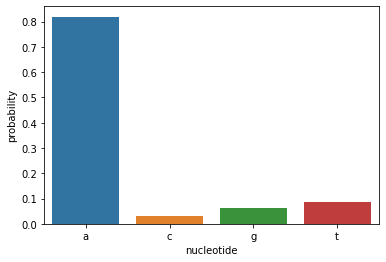

In [18]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")